<a href="https://colab.research.google.com/github/PolyTheML/TD/blob/main/Multiregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('/content/BostonHousing.csv')

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.shape

(506, 14)

In [7]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

## Dealing with duplicated

In [8]:
duplicate_rows = df.duplicated()

In [9]:
num_dup = duplicate_rows.sum()

In [10]:
print(f'Number of duplicate rows: {num_dup}')

Number of duplicate rows: 0


## Dealing with missing Values


In [11]:
df[~df.isna()]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Check for categorical variables

In [12]:
cols = df.columns
num_cols = df._get_numeric_data().columns

In [13]:
num_cols

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [14]:
list(set(cols) - set(num_cols))

[]

In [15]:
print("There is no categorical variables")

There is no categorical variables


# Correlation and Visualization

In [16]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [17]:
c = df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

In [18]:
so[-24:-14]

,,0
medv,lstat,0.737663
lstat,medv,0.737663
dis,age,0.747881
age,dis,0.747881
nox,indus,0.763651
indus,nox,0.763651
dis,nox,0.769230
nox,dis,0.769230
tax,rad,0.910228
rad,tax,0.910228


In [19]:
import matplotlib.pyplot as plt

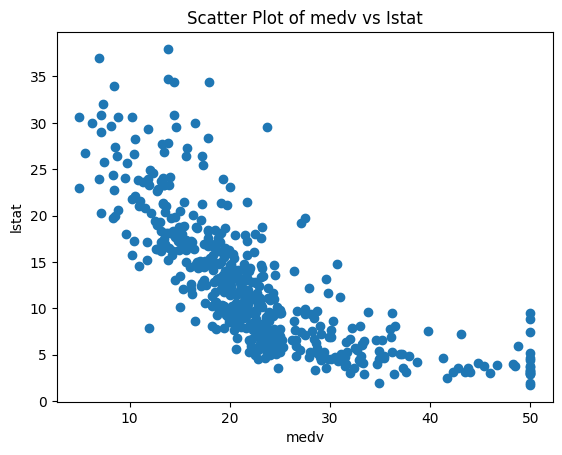

In [20]:
# Assuming 'medv' and 'Istat' are column names in your DataFrame 'df'
plt.scatter(df['medv'], df['lstat'])

plt.xlabel('medv') # Adding label for x-axis
plt.ylabel('lstat') # Adding label for y-axis
plt.title('Scatter Plot of medv vs Istat') # Adding title to the plot

plt.show()


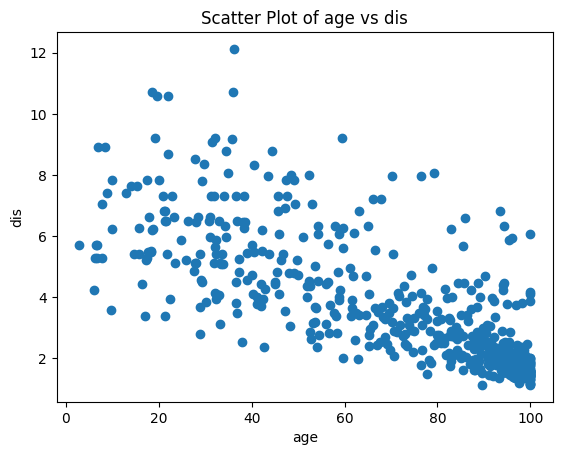

In [21]:
plt.scatter(df['age'], df['dis'])
plt.xlabel('age')
plt.ylabel('dis')
plt.title('Scatter Plot of age vs dis')
plt.show()

Text(0.5, 1.0, 'Scatter Plot of nox vs indus')

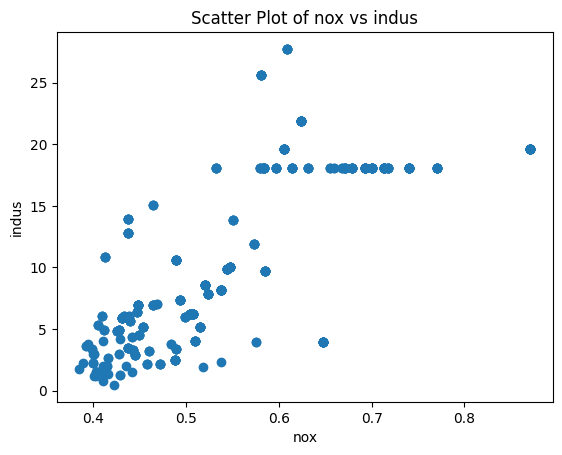

In [22]:
plt.scatter(df['nox'], df['indus'])
plt.xlabel('nox')
plt.ylabel('indus')
plt.title('Scatter Plot of nox vs indus')

In [23]:
#define a splitting fucntion
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# split the data into training and testing data
train_set, test_set = split_train_test(df, 0.2)
print('The size of the training data', len(train_set))
print('The size of the testing data', len(test_set))

The size of the training data 405
The size of the testing data 101


In [25]:
# Define the features (X) and the target (y)

X = df.drop('medv', axis=1)
y = df['medv']

In [27]:
X_train = train_set.drop('medv', axis=1)
y_train = train_set['medv']
X_test = test_set.drop('medv', axis=1)
y_test = test_set['medv']

In [28]:
means = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)

In [29]:
X_train_scaled = (X_train - means) / stds
X_test_scaled = (X_test - means) / stds

Epoch [50/5000], Loss: 545.4455
Epoch [100/5000], Loss: 514.1770
Epoch [150/5000], Loss: 487.1752
Epoch [200/5000], Loss: 462.6843
Epoch [250/5000], Loss: 440.1294
Epoch [300/5000], Loss: 419.1281
Epoch [350/5000], Loss: 399.4136
Epoch [400/5000], Loss: 380.7913
Epoch [450/5000], Loss: 363.1132
Epoch [500/5000], Loss: 346.2652
Epoch [550/5000], Loss: 330.1599
Epoch [600/5000], Loss: 314.7316
Epoch [650/5000], Loss: 299.9311
Epoch [700/5000], Loss: 285.7216
Epoch [750/5000], Loss: 272.0751
Epoch [800/5000], Loss: 258.9690
Epoch [850/5000], Loss: 246.3846
Epoch [900/5000], Loss: 234.3056
Epoch [950/5000], Loss: 222.7170
Epoch [1000/5000], Loss: 211.6050
Epoch [1050/5000], Loss: 200.9561
Epoch [1100/5000], Loss: 190.7576
Epoch [1150/5000], Loss: 180.9969
Epoch [1200/5000], Loss: 171.6616
Epoch [1250/5000], Loss: 162.7398
Epoch [1300/5000], Loss: 154.2196
Epoch [1350/5000], Loss: 146.0893
Epoch [1400/5000], Loss: 138.3374
Epoch [1450/5000], Loss: 130.9527
Epoch [1500/5000], Loss: 123.9239


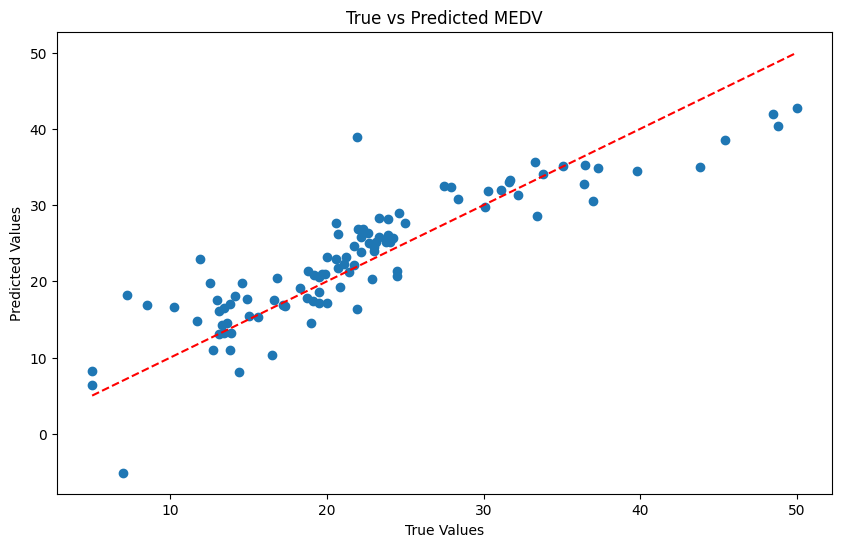

In [32]:
# Convert data into PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)  # Reshape for output
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Define the model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Single output for regression

    def forward(self, x):
        return self.linear(x)

# Model parameters
input_dim = X_train.shape[1]  # Number of features

# Initialize the model, loss function, and optimizer
model = LinearRegressionModel(input_dim)
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Adam optimizer

# Training the model
epochs = 5000
for epoch in range(epochs):
    model.train()

    # Forward pass
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Testing the model
model.eval()
with torch.no_grad():
    predictions_test = model(X_test_tensor)
    test_loss = criterion(predictions_test, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Convert predictions to numpy array for plotting
predictions_test_np = predictions_test.numpy()
y_test_np = y_test_tensor.numpy()

# Plotting true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_np, predictions_test_np)
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--')
plt.title('True vs Predicted MEDV')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()